In [1]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=d94837ba0299e542c6b667b3e1c6122674de9a3e4159c0a0f8272345c0bab5d7
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=1e3d6779e7d0e3ba4ac030c4ca26e042d7a10cbe8c3d49b75e4679adf3c96583
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [4]:
!pip install Ipython

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
filename='data/chainsaw/strong/_dvVfWzJlDM_100000.wav'

In [23]:
import IPython.display as ipd
import librosa
import librosa.display 

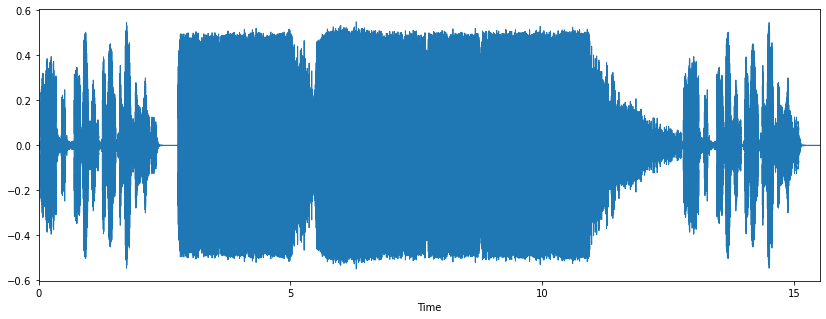

In [24]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [25]:
sample_rate

22050

In [26]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [7]:
wave_sample_rate

44100

In [8]:
wave_audio

array([[197, 197],
       [198, 198],
       [146, 147],
       ...,
       [  0,   0],
       [  0,   0],
       [  0,   0]], dtype=int16)

In [9]:
data

array([0.00460103, 0.00517539, 0.00300723, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [27]:
import pandas as pd
metadata=pd.read_csv('data/audioset_eval_strong.tsv',sep='\t')
metadata.head(10)

,segment_id,start_time_seconds,end_time_seconds,label
0,s9d-2nhuJCQ_30000,0.000,10.000,/m/04rlf
1,s9d-2nhuJCQ_30000,2.627,7.237,/m/053hz1
2,s9d-2nhuJCQ_30000,2.627,9.239,/m/03qtwd
3,s9d-2nhuJCQ_30000,5.634,6.649,/m/01w250
4,s9d-2nhuJCQ_30000,7.201,8.560,/m/0l15bq
5,s9d-2nhuJCQ_30000,8.089,9.230,/m/01w250
6,YxlGt805lTA_30000,0.000,9.378,/m/04rlf
7,YxlGt805lTA_30000,2.331,2.591,/m/09l8g
8,YxlGt805lTA_30000,2.782,3.905,/m/02zsn
9,YxlGt805lTA_30000,3.523,3.714,/m/07rgkc5


In [28]:
metadata['label'].value_counts()

/m/05zppz     15746
/m/04rlf       8304
/m/02zsn       5679
/m/09x0r       5152
/m/07qcpgn     4813
              ...  
/m/02f9f_         2
/m/0c1tlg         2
/t/dd00091        1
/m/0bcdqg         1
/m/018p4k         1
Name: label, Length: 416, dtype: int64

Feature Extraction

In [29]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 668)


In [13]:
mfccs

array([[-340.92966  , -296.5749   , -256.4896   , ..., -539.65106  ,
        -539.65106  , -539.65106  ],
       [ 109.64711  ,  164.72775  ,  168.43915  , ...,    0.       ,
           0.       ,    0.       ],
       [ -25.298334 ,  -15.568834 ,  -44.019867 , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [  -3.8728333,   -2.3508735,   -1.6023047, ...,    0.       ,
           0.       ,    0.       ],
       [  -0.6823764,    2.1159136,   -2.4554384, ...,    0.       ,
           0.       ,    0.       ],
       [  -2.7354965,    3.3304536,    2.508236 , ...,    0.       ,
           0.       ,    0.       ]], dtype=float32)

In [30]:
# Extracting MFCC's For every audio file

import pandas as pd
import os
import librosa

audio_dataset_path='data/chainsaw/strong'
metadata=pd.read_csv('data/audioset_eval_strong.tsv',sep='\t')
metadata.head()

,segment_id,start_time_seconds,end_time_seconds,label
0,s9d-2nhuJCQ_30000,0.000,10.000,/m/04rlf
1,s9d-2nhuJCQ_30000,2.627,7.237,/m/053hz1
2,s9d-2nhuJCQ_30000,2.627,9.239,/m/03qtwd
3,s9d-2nhuJCQ_30000,5.634,6.649,/m/01w250
4,s9d-2nhuJCQ_30000,7.201,8.560,/m/0l15bq


In [31]:
def features_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [32]:
import numpy as np
from tqdm import tqdm

d=0
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        file_name=os.path.join(os.path.abspath(audio_dataset_path),str(row["segment_id"]))+".wav"
        final_class_labels=row["label"]
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except FileNotFoundError:
        d=d+1

16it [00:05,  2.85it/s]C:\Users\HP\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
139538it [33:07, 70.22it/s] 


In [61]:
#converting extracted features into pandas data frame
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-221.23274, 174.47437, -64.004745, 50.352486,...",/m/04rlf
1,"[-221.23274, 174.47437, -64.004745, 50.352486,...",/m/053hz1
2,"[-221.23274, 174.47437, -64.004745, 50.352486,...",/m/03qtwd
3,"[-221.23274, 174.47437, -64.004745, 50.352486,...",/m/01w250
4,"[-221.23274, 174.47437, -64.004745, 50.352486,...",/m/0l15bq


In [62]:
#split dataset into dependent and indepenedent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [63]:
X.shape

(292, 40)

In [64]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [65]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
X_train

array([[-1.1376060e+02,  5.5945465e+01, -2.5890263e+01, ...,
         5.8562976e-01, -9.4584078e-01,  3.9734879e-01],
       [-2.6379553e+02,  5.5227898e+01, -4.0356533e+01, ...,
        -1.8718011e+00, -2.4764170e-01,  7.5946957e-01],
       [-2.0353642e+02,  8.6051971e+01, -3.2284248e+01, ...,
         8.6388665e-01, -2.6540545e-01, -1.4658481e+00],
       ...,
       [-2.2805685e+02,  1.1735794e+02, -8.5165810e+01, ...,
         6.5797935e+00,  4.0131731e+00,  4.2494092e+00],
       [-1.8496452e+02,  9.3558594e+01, -2.8218876e+01, ...,
        -6.9702423e-01, -1.3877953e+00, -1.5188010e+00],
       [-1.8849321e+02,  8.3719414e+01, -4.2538555e+01, ...,
         2.2718254e-01, -2.6254210e+00,  5.3885311e-01]], dtype=float32)

In [67]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
X_train.shape

(233, 40)

In [69]:
X_test.shape

(59, 40)

In [70]:
y_train.shape

(233, 58)

In [71]:
y_test.shape

(59, 58)

In [72]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [54]:
#number of classes
num_labels=y.shape[1]

In [56]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [58]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [59]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


AttributeError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py:845 step_function  **
        write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disable=protected-access
    C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py:2977 write_scalar_summaries
        tf.summary.scalar('batch_' + name, value, step=step)
    C:\Users\HP\anaconda3\lib\site-packages\tensorboard\plugins\scalar\summary_v2.py:84 scalar
        getattr(tf.summary.experimental, "summary_scope", None)

    AttributeError: module 'tensorboard.summary._tf.summary' has no attribute 'experimental'


In [52]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.24137930572032928


In [91]:
filename="data/chainsaw/strong/KcoN0mNivaI_410000.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)
#predictions = (model.predict(prediction_feature) > 0.5).astype("int64")
#print(predictions)

predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4]


In [63]:
metadata['label'].unique()

array(['/m/04rlf', '/m/053hz1', '/m/03qtwd', '/m/01w250', '/m/0l15bq',
       '/m/09l8g', '/m/02zsn', '/m/07rgkc5', '/m/0jbk', '/t/dd00048',
       '/m/07jdr', '/m/05zppz', '/m/02mk9', '/m/07pb8fc', '/m/01h8n0',
       '/m/025_jnm', '/m/01j3sz', '/m/0dgw9r', '/m/06hps', '/m/0lyf6',
       '/m/028v0c', '/m/09x0r', '/m/07rqsjt', '/m/06h7j', '/m/0c1dj',
       '/m/03w41f', '/t/dd00004', '/t/dd00003', '/m/0l14jd', '/m/07qfr4h',
       '/m/07qcpgn', '/m/07qjznt', '/m/0ytgt', '/t/dd00005', '/m/0gy1t2s',
       '/m/01c194', '/m/093_4n', '/m/01x3z', '/m/046dlr', '/m/07qjznl',
       '/m/07pn_8q', '/m/015p6', '/m/07pggtn', '/m/012f08', '/m/07qc9xj',
       '/m/07qv4k0', '/m/01m2v', '/m/0316dw', '/m/02dgv', '/m/07ppn3j',
       '/m/03cczk', '/t/dd00077', '/m/09xqv', '/m/07pqc89', '/m/07p7b8y',
       '/m/07prgkl', '/m/04k94', '/m/0838f', '/m/03vt0', '/m/0395lw',
       '/m/0dgbq', '/m/02_41', '/m/01yg9g', '/t/dd00092', '/m/03v3yw',
       '/m/0h0rv', '/m/07r_25d', '/m/020bb7', '/m/083vt', '/m/0_

In [2]:
d = dict()
f = open("data/mid_to_display_name.tsv")
for line in f:
    line = line.strip('\n')
    (key, val) = line.split("\t")
    d[key] = val

print(d)

{'/g/11b630rrvh': 'Kettle whistle', '/g/122z_qxw': 'Firecracker', '/m/01280g': 'Wild animals', '/m/012f08': 'Motor vehicle (road)', '/m/012n7d': 'Ambulance (siren)', '/m/012ndj': 'Fire engine, fire truck (siren)', '/m/012xff': 'Toothbrush', '/m/0130jx': 'Sink (filling or washing)', '/m/014yck': 'Aircraft engine', '/m/014zdl': 'Explosion', '/m/0150b9': 'Change ringing (campanology)', '/m/015jpf': 'Dial tone', '/m/015lz1': 'Singing', '/m/015p6': 'Bird', '/m/0160x5': 'Digestive', '/m/0174k2': 'Washing machine', '/m/018p4k': 'Cart', '/m/018w8': 'Basketball bounce', '/m/0193bn': 'Sonic boom', '/m/0195fx': 'Subway, metro, underground', '/m/0199g': 'Bicycle, tricycle', '/m/019jd': 'Boat, Water vehicle', '/m/01b82r': 'Sawing', '/m/01b9nn': 'Reverberation', '/m/01b_21': 'Cough', '/m/01bjv': 'Bus', '/m/01c194': 'Mantra', '/m/01d380': 'Drill', '/m/01d3sd': 'Snoring', '/m/01dwxx': 'Gull, seagull', '/m/01g50p': 'Railroad car, train wagon', '/m/01g90h': 'Stomach rumble', '/m/01h3n': 'Bee, wasp, etc.

In [4]:
#predict

filename="data/chainsaw/strong/BHJoLGId1go_0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
#predicted_label=model.predict_classes(mfccs_scaled_features)
predict_x=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(predict_x,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

NameError: name 'librosa' is not defined

In [6]:
d['/m/01j4z9']

'Chainsaw'